# <center>Vinho Verde Wine Quality Classification
* ## Stage 1: Data Preprocessing
* ### Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style;  style.use('ggplot')

* ### Importing the Dataset

In [2]:
vinho_verde_red_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
vinho_verde_white_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
vinho_verde_red = pd.read_csv(vinho_verde_red_url, delimiter=';')
vinho_verde_white = pd.read_csv(vinho_verde_white_url, delimiter=';')

# standardize column names for ease of use
vinho_verde_white.columns = [c.lower().replace(' ', '_') for c in vinho_verde_white.columns]
vinho_verde_red.columns = [c.lower().replace(' ', '_') for c in vinho_verde_red.columns]

* ### Taking a peek on our Dataset

In [3]:
vinho_verde_red.head(15)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
vinho_verde_white.head(15)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


* ### What is the type of each feature?

In [5]:
vinho_verde_red.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
vinho_verde_white.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

* ### Getting a Basic Statistical Description of each Dataset

In [7]:
vinho_verde_red.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
vinho_verde_white.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


* ### Functions
  * **find_outlier_indices:** Given a DataFrame return the outlier indices in list of tuples in (feature, row_indices) format, *provided that the feature values are greater than Q75 + 1.5 IQR or less that Q25 - 1.5 IQR*
  * **drop_outliers:** Given a DataFrame and the Outlier list of tuples in (feature, row_indices) format, return the DataFrame minus the included in the list row indices

In [9]:
def find_outlier_indices(df):
    quantiles = df.quantile([0.25, 0.75])
    feature_outlier_indices = []
    for feature in quantiles:
        q25, q75 = quantiles[feature].values
        iqr = q75 - q25
        
        outlier_indices = df.index[(df[feature] < q25 - (1.5 * iqr)) | (df[feature] > q75 + (1.5 * iqr))].tolist()
        feature_outlier_indices.append((feature, outlier_indices))
    return feature_outlier_indices

def drop_outliers(df, outliers):
    indices = set([])
    for col, col_indices in outliers:
        indices = indices.union(set(col_indices))
    return df.drop(list(indices))

* ### 1.1. Detecting NaN/Empty Values

In [10]:
for feature in vinho_verde_white:
    print ('Feature: {0} === {1} NaN Values, {2} Missing Values.'.format(feature, np.sum(vinho_verde_white[feature] == np.nan),  np.sum(vinho_verde_white[feature].isnull())))

Feature: fixed_acidity === 0 NaN Values, 0 Missing Values.
Feature: volatile_acidity === 0 NaN Values, 0 Missing Values.
Feature: citric_acid === 0 NaN Values, 0 Missing Values.
Feature: residual_sugar === 0 NaN Values, 0 Missing Values.
Feature: chlorides === 0 NaN Values, 0 Missing Values.
Feature: free_sulfur_dioxide === 0 NaN Values, 0 Missing Values.
Feature: total_sulfur_dioxide === 0 NaN Values, 0 Missing Values.
Feature: density === 0 NaN Values, 0 Missing Values.
Feature: ph === 0 NaN Values, 0 Missing Values.
Feature: sulphates === 0 NaN Values, 0 Missing Values.
Feature: alcohol === 0 NaN Values, 0 Missing Values.
Feature: quality === 0 NaN Values, 0 Missing Values.


In [11]:
for feature in vinho_verde_red:
    print ('Feature: {0} === {1} NaN Values, {2} Missing Values.'.format(feature, np.sum(vinho_verde_red[feature] == np.nan),  np.sum(vinho_verde_red[feature].isnull())))

Feature: fixed_acidity === 0 NaN Values, 0 Missing Values.
Feature: volatile_acidity === 0 NaN Values, 0 Missing Values.
Feature: citric_acid === 0 NaN Values, 0 Missing Values.
Feature: residual_sugar === 0 NaN Values, 0 Missing Values.
Feature: chlorides === 0 NaN Values, 0 Missing Values.
Feature: free_sulfur_dioxide === 0 NaN Values, 0 Missing Values.
Feature: total_sulfur_dioxide === 0 NaN Values, 0 Missing Values.
Feature: density === 0 NaN Values, 0 Missing Values.
Feature: ph === 0 NaN Values, 0 Missing Values.
Feature: sulphates === 0 NaN Values, 0 Missing Values.
Feature: alcohol === 0 NaN Values, 0 Missing Values.
Feature: quality === 0 NaN Values, 0 Missing Values.


<center>_In that occation we didn't had any NaN or Missing Values, so we move forward to detect (and remove) the Outliers that (may) exist in the dataset_

* ### 1.2.i. Removing the label vector from each Dataset

In [12]:
vinho_verde_red_X = vinho_verde_red.drop(['quality'], axis=1)
vinho_verde_red_y = vinho_verde_red['quality']
vinho_verde_white_X = vinho_verde_white.drop(['quality'], axis=1)
vinho_verde_white_y = vinho_verde_white['quality']

* ### 1.2.ii Searching (and Removing) Outliers

In [13]:
feature_outlier_indices_white = find_outlier_indices(vinho_verde_white_X)
for feature, feature_indices in feature_outlier_indices_white:
    print ('Feature: {0} === Outlier Values Count: {1}'.format(feature, len(feature_indices)))

Feature: fixed_acidity === Outlier Values Count: 119
Feature: volatile_acidity === Outlier Values Count: 186
Feature: citric_acid === Outlier Values Count: 270
Feature: residual_sugar === Outlier Values Count: 7
Feature: chlorides === Outlier Values Count: 212
Feature: free_sulfur_dioxide === Outlier Values Count: 50
Feature: total_sulfur_dioxide === Outlier Values Count: 19
Feature: density === Outlier Values Count: 5
Feature: ph === Outlier Values Count: 75
Feature: sulphates === Outlier Values Count: 124
Feature: alcohol === Outlier Values Count: 0


In [14]:
feature_outlier_indices_red = find_outlier_indices(vinho_verde_red_X)
for feature, feature_indices in feature_outlier_indices_red:
    print ('Feature: {0} === Outlier Values Count: {1}'.format(feature, len(feature_indices)))

Feature: fixed_acidity === Outlier Values Count: 49
Feature: volatile_acidity === Outlier Values Count: 19
Feature: citric_acid === Outlier Values Count: 1
Feature: residual_sugar === Outlier Values Count: 155
Feature: chlorides === Outlier Values Count: 112
Feature: free_sulfur_dioxide === Outlier Values Count: 30
Feature: total_sulfur_dioxide === Outlier Values Count: 55
Feature: density === Outlier Values Count: 45
Feature: ph === Outlier Values Count: 35
Feature: sulphates === Outlier Values Count: 59
Feature: alcohol === Outlier Values Count: 13


#### *Before Outlier Removal*

In [15]:
vinho_verde_white_X.shape

(4898, 11)

In [16]:
vinho_verde_red_X.shape

(1599, 11)

#### *After Outlier Removal*

In [17]:
vv_white_X = drop_outliers(vinho_verde_white_X, feature_outlier_indices_white)
vv_white_y = drop_outliers(vinho_verde_white_y, feature_outlier_indices_white)

vv_white_X.shape

(4011, 11)

In [18]:
vv_red_X = drop_outliers(vinho_verde_red_X, feature_outlier_indices_red)
vv_red_y = drop_outliers(vinho_verde_red_y, feature_outlier_indices_red)

vv_red_X.shape

(1194, 11)

In [19]:
type(vv_red_y)

pandas.core.series.Series

* ### 1.3. Correlation Analysis 

In [20]:
vv_white_corr = pd.concat([vv_white_X, vv_white_y], axis=1).corr().abs()
vv_red_corr = pd.concat([vv_red_X, vv_red_y], axis=1).corr().abs()

* #### Correlation Analysis on Outlier Removed Red Wine Samples

In [21]:
vv_red_features = vv_red_corr.shape[1]

s = vv_red_corr.unstack().sort_values(ascending=False, kind="mergesort")
print ('Correlation Analysis: Red Wine - Outlier Free\n\n', s[vv_red_features:])

Correlation Analysis: Red Wine - Outlier Free

 ph                    fixed_acidity           0.684880
fixed_acidity         ph                      0.684880
citric_acid           fixed_acidity           0.662847
fixed_acidity         citric_acid             0.662847
citric_acid           volatile_acidity        0.629348
volatile_acidity      citric_acid             0.629348
total_sulfur_dioxide  free_sulfur_dioxide     0.619431
free_sulfur_dioxide   total_sulfur_dioxide    0.619431
density               fixed_acidity           0.607073
fixed_acidity         density                 0.607073
alcohol               density                 0.546062
density               alcohol                 0.546062
quality               alcohol                 0.511374
alcohol               quality                 0.511374
ph                    citric_acid             0.476570
citric_acid           ph                      0.476570
quality               sulphates               0.415356
sulphates        

##### Most Correlated Features

| Feature A           | Feature B            | Correlation  |
| -------------       |    :-------------:   |        -----:|
| fixed_acidity       | ph                   | **0.684880** |
| fixed_acidity       | citric_acid          | **0.662847** |
| volatile_acidity    | citric_acid          | **0.629348** |
| free_sulfur_dioxide | total_sulfur_dioxide | **0.619431** |
| fixed_acidity       | density              | **0.607073** |
| density             | alcohol              | **0.546062** |
| alcohol             | quality              | **0.511374** |

* #### Correlation Analysis on Outlier Removed White Wine Samples

In [22]:
vv_white_features = vv_white_corr.shape[1]

s = vv_white_corr.unstack().sort_values(ascending=False, kind="mergesort")
print ('Correlation Analysis: White Wine - Outlier Free\n\n', s[vv_white_features:], '\n\n')

Correlation Analysis: White Wine - Outlier Free

 density               residual_sugar          0.845734
residual_sugar        density                 0.845734
alcohol               density                 0.821863
density               alcohol                 0.821863
total_sulfur_dioxide  free_sulfur_dioxide     0.622409
free_sulfur_dioxide   total_sulfur_dioxide    0.622409
alcohol               chlorides               0.556179
chlorides             alcohol                 0.556179
density               total_sulfur_dioxide    0.555139
total_sulfur_dioxide  density                 0.555139
density               chlorides               0.508491
chlorides             density                 0.508491
alcohol               residual_sugar          0.494863
residual_sugar        alcohol                 0.494863
alcohol               total_sulfur_dioxide    0.475592
total_sulfur_dioxide  alcohol                 0.475592
quality               alcohol                 0.422100
alcohol        

##### Most Correlated Features

| Feature A            | Feature B            | Correlation  |
| -------------        |    :-------------:   |        -----:|
| residual_sugar       | density              | **0.845734** |
| density              | alcohol              | **0.821863** |
| free_sulfur_dioxide  | total_sulfur_dioxide | **0.622409** |
| chlorides            | alcohol              | **0.556179** |
| total_sulfur_dioxide | density              | **0.555139** |
| chlorides            | density              | **0.508491** |

* ### 1.4. Feature Normalization

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler_red = MinMaxScaler()
vv_red_normalized =  scaler_red.fit_transform(vv_red_X)
vv_red_norm = pd.DataFrame(vv_red_normalized, columns=vinho_verde_red.columns[:-1])

scaler_white = MinMaxScaler()
vv_white_normalized =  scaler_white.fit_transform(vv_white_X)
vv_white_norm = pd.DataFrame(vv_white_normalized, columns=vinho_verde_white.columns[:-1])

In [25]:
vv_red_norm.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,0.425914,0.455067,0.339896,0.410734,0.480479,0.341606,0.311681,0.488030,0.518935,0.464914,0.354313
std,0.202936,0.186304,0.246860,0.184233,0.183339,0.215099,0.224869,0.185479,0.178555,0.178763,0.207579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.277778,0.305085,0.109589,0.291667,0.358974,0.170732,0.137931,0.364451,0.391892,0.338462,0.170213
50%,0.375000,0.451977,0.328767,0.375000,0.474359,0.292683,0.258621,0.491329,0.520270,0.430769,0.297872
75%,0.541667,0.576271,0.534247,0.541667,0.589744,0.463415,0.428879,0.606358,0.631757,0.569231,0.489362
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
vv_white_norm.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
count,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000
mean,0.503325,0.454814,0.477204,0.269940,0.478933,0.419889,0.495849,0.454793,0.489671,0.483624,0.376148
std,0.184009,0.188274,0.183250,0.230351,0.179736,0.192334,0.175758,0.194356,0.189055,0.183309,0.209130
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.320988,0.361702,0.056075,0.345455,0.282051,0.367521,0.302357,0.356164,0.351852,0.189655
50%,0.500000,0.444444,0.446809,0.214953,0.472727,0.410256,0.474359,0.433670,0.479452,0.462963,0.362069
75%,0.625000,0.567901,0.574468,0.425234,0.600000,0.551282,0.619658,0.591919,0.616438,0.592593,0.517241
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* ### 1.5. T-SNE Dataset 2-D Plot (Non-Normalized, Outlier-Free Dataset)

In [27]:
from sklearn.manifold import TSNE

tsne_red = TSNE(n_components=2, learning_rate=370,  metric='euclidean', init='pca', verbose=5)
vv_red_embedded = pd.DataFrame(tsne_red.fit_transform(vv_red_X))

tsne_white = TSNE(n_components=2, learning_rate=400, metric='euclidean', init='pca', verbose=5) #2-dimensional PCA transformation
vv_white_embedded = pd.DataFrame(tsne_white.fit_transform(vv_white_X))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1194 samples in 0.002s...
[t-SNE] Computed neighbors for 1194 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1194
[t-SNE] Computed conditional probabilities for sample 1194 / 1194
[t-SNE] Mean sigma: 2.182457
[t-SNE] Computed conditional probabilities in 0.041s
[t-SNE] Iteration 50: error = 51.8882141, gradient norm = 0.2855735 (50 iterations in 1.158s)
[t-SNE] Iteration 100: error = 52.1575508, gradient norm = 0.2888313 (50 iterations in 1.155s)
[t-SNE] Iteration 150: error = 52.7151299, gradient norm = 0.2818089 (50 iterations in 1.131s)
[t-SNE] Iteration 200: error = 52.8154793, gradient norm = 0.2841939 (50 iterations in 1.146s)
[t-SNE] Iteration 250: error = 54.5300865, gradient norm = 0.2923173 (50 iterations in 1.175s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.530087
[t-SNE] Iteration 300: error = 0.5797427, gradient norm = 0.0008058 (50 iterations in 1.121s)

<Figure size 1800x1440 with 0 Axes>

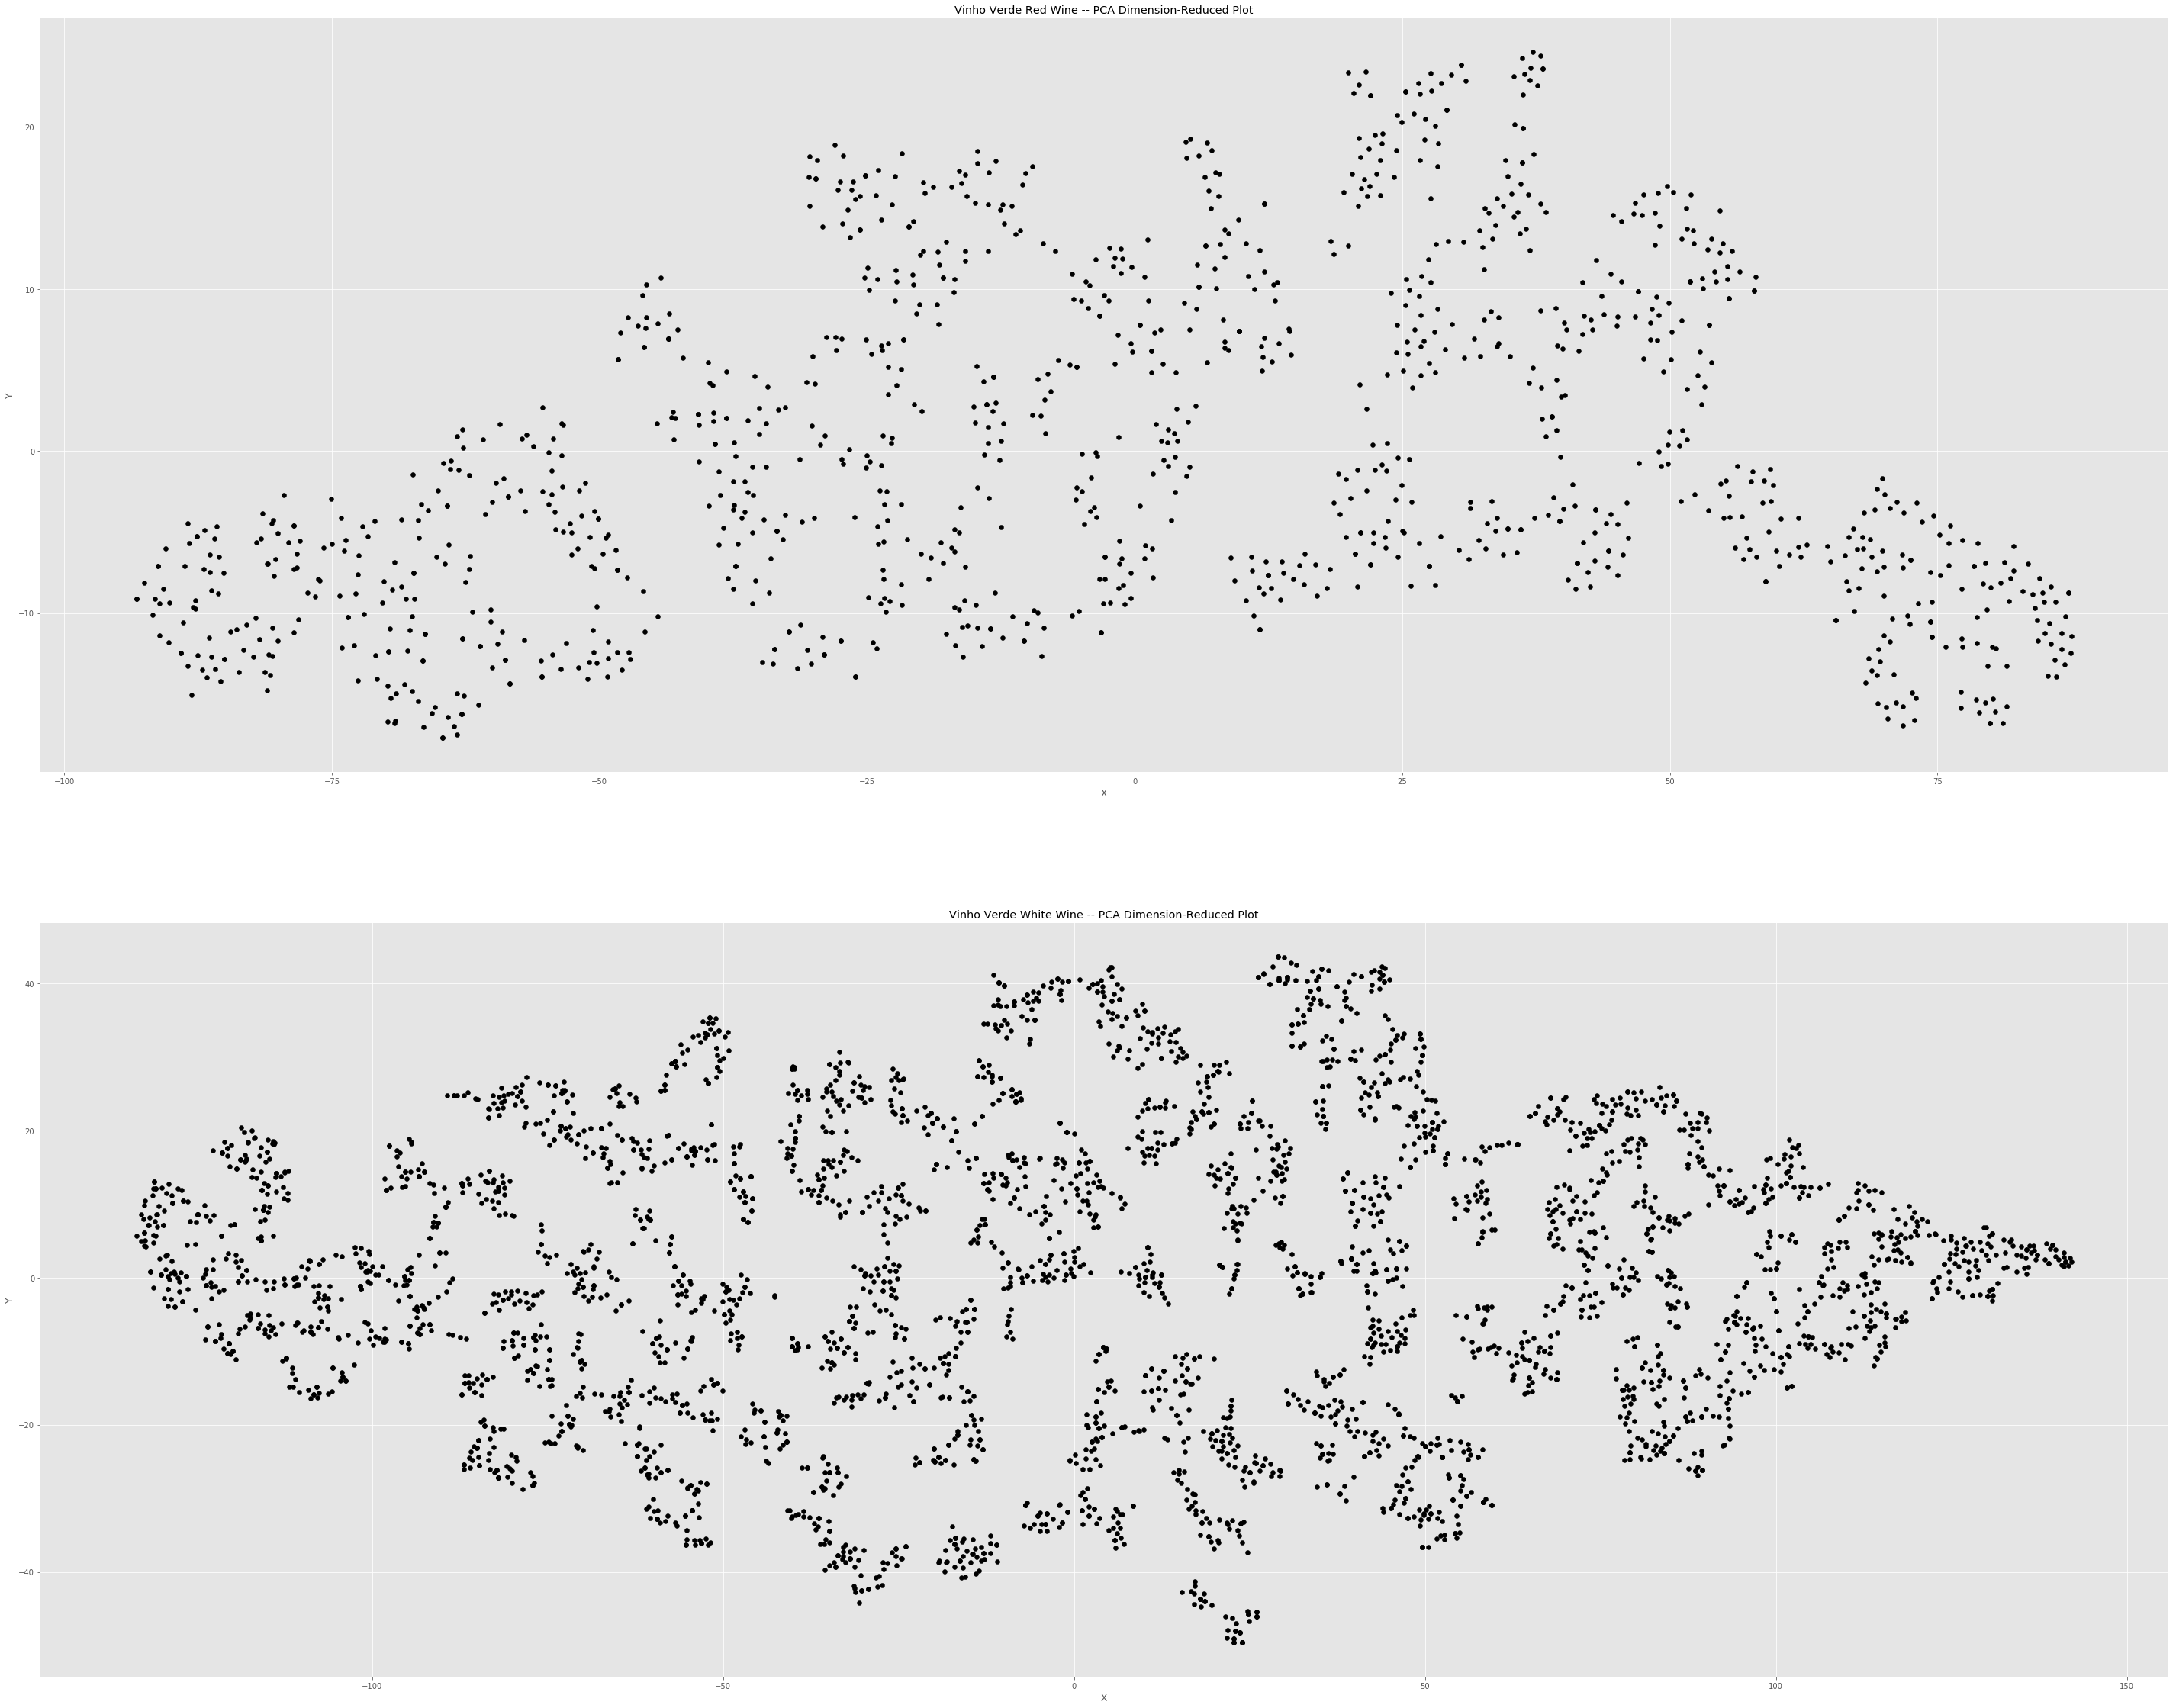

In [39]:
plt.figure(0, figsize=(25, 20))

plt.subplots(2,1, figsize=(50, 40))
# Subfigure 1 - Red Wine
plt.subplot(2,1,1)
plt.title('Vinho Verde Red Wine -- PCA Dimension-Reduced Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(vv_red_embedded[0], vv_red_embedded[1], color='black')
# Subfigure 2 - White Wine
plt.subplot(2,1,2)
plt.title('Vinho Verde White Wine -- PCA Dimension-Reduced Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(vv_white_embedded[0], vv_white_embedded[1], color='black')
# Show both figures side-by-side
plt.show()

* ### 1.6.1.i. PCA Dimensionality Reduction to 2 Principal Components

In [76]:
from sklearn.decomposition import PCA

pca_red = PCA(n_components=2) #2-dimensional PCA transformation
vv_red_pca = pd.DataFrame(pca_red.fit_transform(vv_red_X))

pca_white = PCA(n_components=2) #2-dimensional PCA transformation
vv_white_pca = pd.DataFrame(pca_white.fit_transform(vv_white_X))

* ### 1.6.1.ii. PCA Dimensionality Reduction with Minka's MLE Algorithm to estimate the Principal Components

In [41]:
from sklearn.decomposition import PCA

pca_red_tmp = PCA(n_components='mle', svd_solver='full') #2-dimensional PCA transformation
vv_red_pca_tmp = pd.DataFrame(pca_red_tmp.fit_transform(vv_red_X))

pca_white_tmp = PCA(n_components='mle', svd_solver='full') #2-dimensional PCA transformation
vv_white_pca_tmp = pd.DataFrame(pca_white_tmp.fit_transform(vv_white_X))

* ### 1.6.1.ii. Plot the Dataset

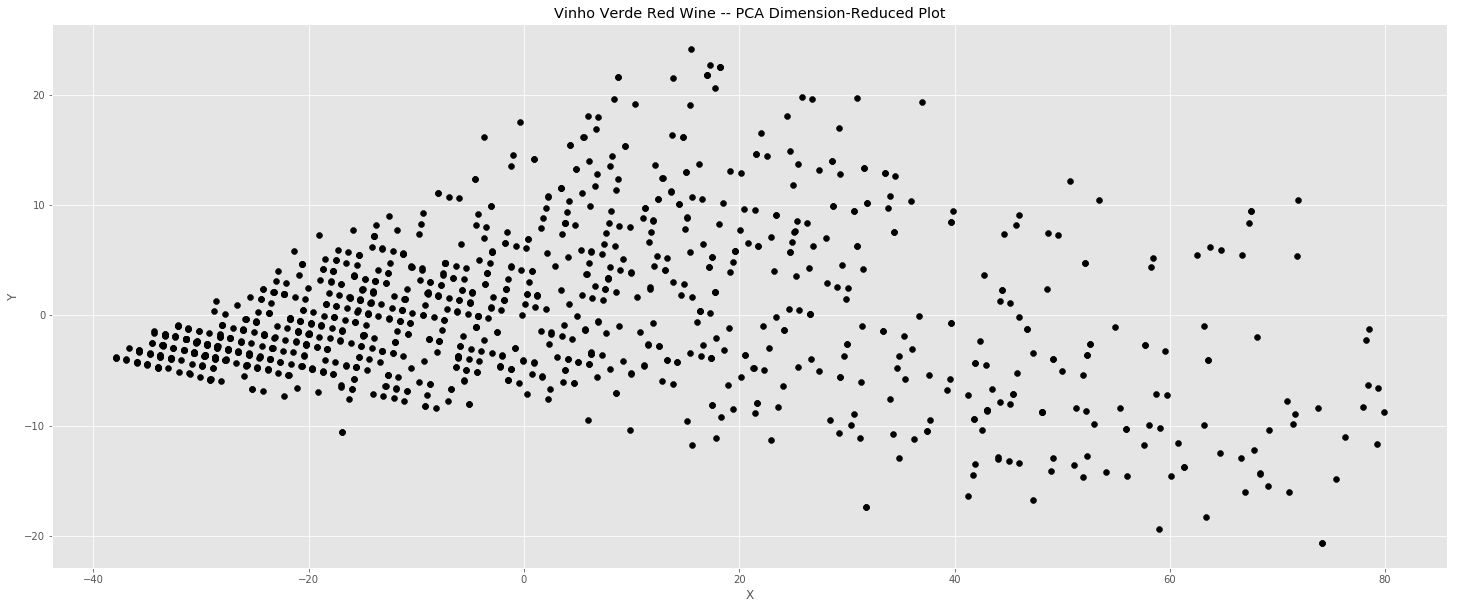

In [78]:
plt.figure(0, figsize=(25, 10))
plt.title('Vinho Verde Red Wine -- PCA Dimension-Reduced Plot')
plt.xlabel('X')
plt.ylabel('Y')

plt.scatter(vv_red_pca[0], vv_red_pca[1], color='black')
plt.show()

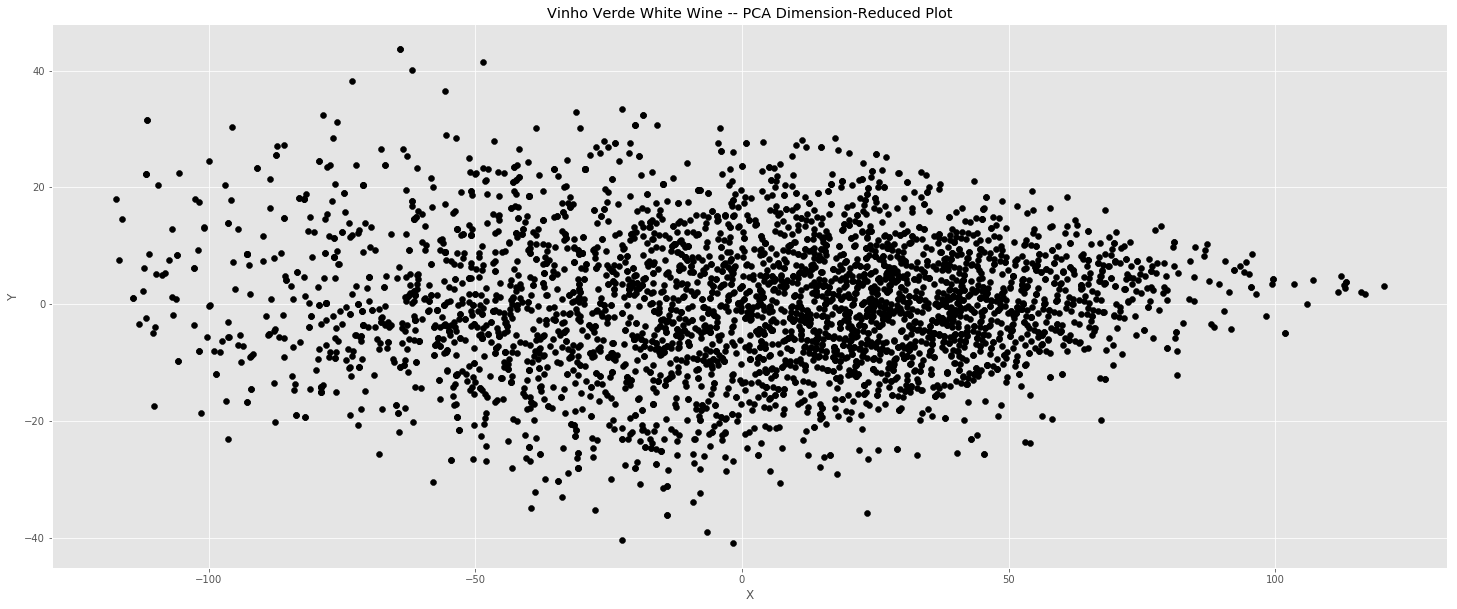

In [77]:
plt.figure(0, figsize=(25, 10))
plt.title('Vinho Verde White Wine -- PCA Dimension-Reduced Plot')
plt.xlabel('X')
plt.ylabel('Y')

plt.scatter(vv_white_pca[0], vv_white_pca[1], color='black')
plt.show()

* ### 2. Save the Dataset for use in future Steps.

In [37]:
import os
cache_dir = os.path.join('.', 'cache')
try:
    os.mkdir(cache_dir)
    print ('Creating Directory {0}'.format(cache_dir))
except FileExistsError:
    print ('Directory {0} Exists. Saving...'.format(cache_dir))

# Original
np.save(os.path.join(cache_dir, 'vinho_verde_red_X.npy'), vinho_verde_red_X)
np.save(os.path.join(cache_dir, 'vinho_verde_white_X.npy'), vinho_verde_white_X)
# Outlier-Free
np.save(os.path.join(cache_dir, 'vv_red_X.npy'), vv_red_X)
np.save(os.path.join(cache_dir, 'vv_white_X.npy'), vv_white_X)
# Outlier-Free; Normalized
np.save(os.path.join(cache_dir, 'vv_red_X_norm.npy'), vv_red_norm)
np.save(os.path.join(cache_dir, 'vv_white_X_norm.npy'), vv_white_norm)

# Original Labels
np.save(os.path.join(cache_dir, 'vinho_verde_red_y.npy'), vinho_verde_red_y)
np.save(os.path.join(cache_dir, 'vinho_verde_white_y.npy'), vinho_verde_white_y)
# Outlier-Free/Outlier-Free;Normalized Labels
np.save(os.path.join(cache_dir, 'vv_white_y.npy'), vv_white_y)
np.save(os.path.join(cache_dir, 'vv_red_y.npy'), vv_red_y)

Directory .\cache Exists. Saving...
